In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/synthetic_dataset.csv")

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1614 non-null   object 
 1   Price     4188 non-null   float64
 2   Rating    2312 non-null   float64
 3   Stock     3010 non-null   object 
 4   Discount  3970 non-null   float64
dtypes: float64(3), object(2)
memory usage: 170.5+ KB


In [5]:
df.shape

(4362, 5)

In [6]:
df.isnull().sum()

Category    2748
Price        174
Rating      2050
Stock       1352
Discount     392
dtype: int64

In [7]:
c1 = df.select_dtypes("float")
c1.shape

(4362, 3)

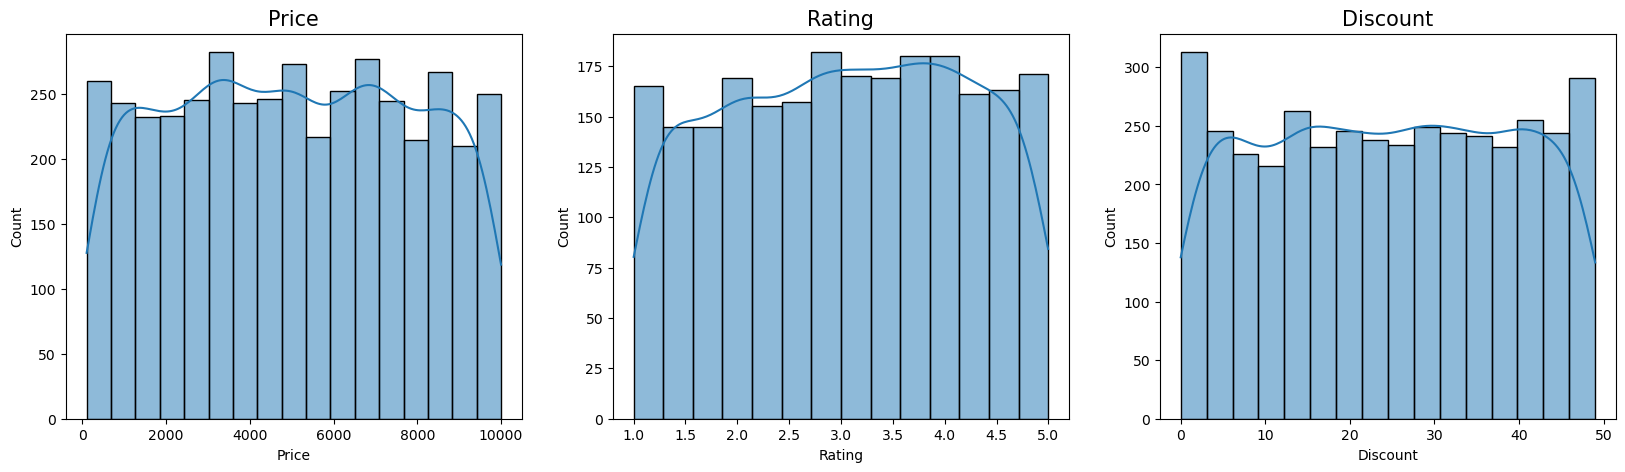

In [9]:
fig,axs = plt.subplots(1,3, figsize=(20,5))

for i in range(3):
    sns.histplot(data = df, x = c1.columns[i], ax=axs[i],kde = True)
    axs[i].set_title(c1.columns[i],fontsize = 15)
plt.show()

### null value handling

In [11]:
c2 = df.select_dtypes("object")

for i in c2:
    df[i] = df[i].fillna(df[i].mode()[0])

for j in c1:
    df[j] = df[j].fillna(df[j].median())

df.isnull().sum()

Category    0
Price       0
Rating      0
Stock       0
Discount    0
dtype: int64

### one hot encoding

In [12]:
df1 = df.copy()

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  4362 non-null   object 
 1   Price     4362 non-null   float64
 2   Rating    4362 non-null   float64
 3   Stock     4362 non-null   object 
 4   Discount  4362 non-null   float64
dtypes: float64(3), object(2)
memory usage: 170.5+ KB


In [14]:
c4 = df1.select_dtypes("object")

df1 = pd.get_dummies(df1, columns = c4.columns, dtype = int, drop_first = True)

In [15]:
df1.head()

,Price,Rating,Discount,Category_B,Category_C,Category_D,Stock_Out of Stock
0,5548.0,1.870322,0.0,0,1,0,0
1,3045.0,4.757798,38.0,0,1,0,0
2,4004.0,3.082060,0.0,0,1,0,0
3,4808.0,1.492085,33.0,0,1,0,0
4,1817.0,3.082060,23.0,0,1,0,1


In [16]:
df1.describe()

,Price,Rating,Discount,Category_B,Category_C,Category_D,Stock_Out of Stock
count,4362.000000,4362.000000,4362.000000,4362.000000,4362.000000,4362.000000,4362.000000
mean,5016.154058,3.058862,24.560064,0.086657,0.727419,0.093535,0.343191
std,2782.754572,0.832398,13.687865,0.281365,0.445338,0.291214,0.474829
min,102.000000,1.000366,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2748.250000,2.949071,14.000000,0.000000,0.000000,0.000000,0.000000
50%,4996.500000,3.082060,25.000000,0.000000,1.000000,0.000000,0.000000
75%,7313.000000,3.180129,36.000000,0.000000,1.000000,0.000000,1.000000
max,9999.000000,4.997818,49.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
mm = MinMaxScaler()

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               4362 non-null   float64
 1   Rating              4362 non-null   float64
 2   Discount            4362 non-null   float64
 3   Category_B          4362 non-null   int64  
 4   Category_C          4362 non-null   int64  
 5   Category_D          4362 non-null   int64  
 6   Stock_Out of Stock  4362 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 238.7 KB


In [24]:
c5 = df1.select_dtypes("float").columns

df1[c5] = mm.fit_transform(df1[c5])

In [25]:
df1.describe()

,Price,Rating,Discount,Category_B,Category_C,Category_D,Stock_Out of Stock
count,4362.000000,4362.000000,4362.000000,4362.000000,4362.000000,4362.000000,4362.000000
mean,0.496530,0.514952,0.501226,0.086657,0.727419,0.093535,0.343191
std,0.281172,0.208232,0.279344,0.281365,0.445338,0.291214,0.474829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.267379,0.487487,0.285714,0.000000,0.000000,0.000000,0.000000
50%,0.494544,0.520755,0.510204,0.000000,1.000000,0.000000,0.000000
75%,0.728605,0.545288,0.734694,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
